In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from deonticAgent import deonticAgent
from virtuousAgent import virtuousAgent
from utilitarianAgent import utilitarianAgent
from transcendenceAgent import transcendenceAgent
from populationGraph import populationGraph
from plotFunctions import *
from adversarialAgent import adversarialAgent

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

In [3]:
# G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
# myPos = nx.spring_layout(G, seed = 40)
# nx.draw(G, pos=myPos, with_labels=True)

In [4]:
e = 0
prevStates = []
maxEpochs = 1
common_attrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}
network = populationGraph(numNodes,[1],[virtuousAgent], common_attrs)
while e<maxEpochs:
    e+=1
    G = network.getGraph()
    msgList = network.createMsgs(numMsg)  #Message list creation
    prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
    nf, nd = network.transmitMsgs()
    print(network.getNetworkProp("utility"))
    print(nf, nd)
    for i in range(numNodes) : G.nodes[i]['agent'].epochUpdate()
    curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
    if np.count_nonzero(curStable) == numNodes:
        break
print(e)

cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.01  virtue points:  2.0
forward utility  0.99
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  0.91  virtue points:  0
forward utility  1.0899999999999999
cost :  0.8200000000000001  virtue points:  0
forward utility  1.18
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  0.91  virtue points:  0
forward utility  1.0899999999999999
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  1.0  virtue points:  0
forward utility  1.0
cost :  0.92  virtue points:  2.0
forward utility  1.08
cost :  1.01  virtue points:  2.0
forward utility  0.99
cost :  1.01  virtue points:  2.0
forward utility  0.99
cost :  0.92  virtue points:  2.0
forward utility  1

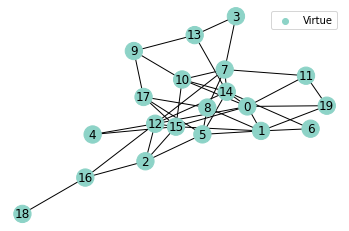

In [5]:
network.plotGraph()

In [6]:
network.getResilience()

0.35


55.25

In [7]:
np.mean(network.getNetworkProp('virtuePoints'))

17.7

In [8]:
print(np.sum(network.getNetworkProp('utility')))
print(np.sum(network.getNetworkProp('burnout')))

1700
7


In [9]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

1
20.0


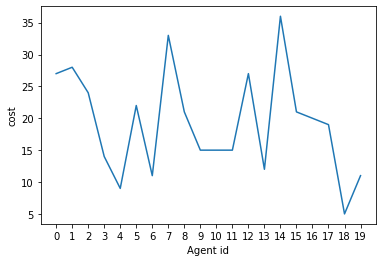

In [10]:
plotAgentwiseProp(G, "cost")

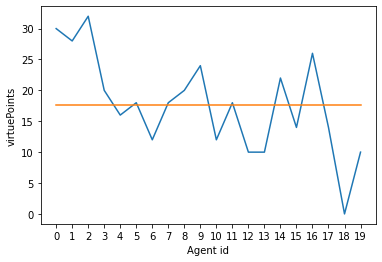

In [11]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  _,_,baseline = plt.stem(range(numNodes), propertyValues, use_line_collection=False)


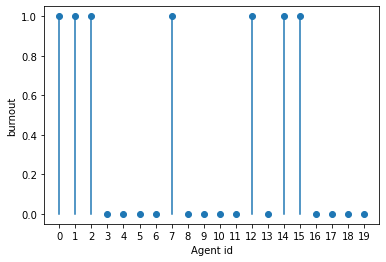

In [12]:
plotAgentwiseProp(G, "burnout", plotType='stem')

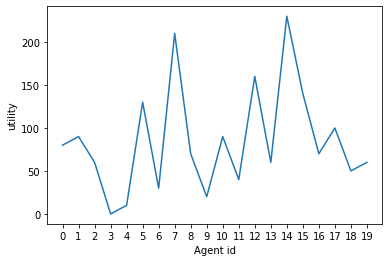

In [13]:
plotAgentwiseProp(G, "utility")